In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from preprocessing import concat_loc_sum, sum_java_words

### Removing tokens that appear in more than 10% of documents.
It's possible to do this setting the parameter max_df=0.1 

In [13]:
msr_data = pd.read_csv('../msr_results/tokenslockeywordskeywordcount.csv', encoding = 'ANSI')
y_msr = msr_data['class']
msr = msr_data.drop(columns=['class'])

Training the model on MSR data and evaluating on 20% of the same dataset.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(msr, y_msr, train_size=0.8, 
                                                random_state=33, shuffle=True)

msr_vectorizer = CountVectorizer(max_features=1000, max_df=0.1)
bow_train = msr_vectorizer.fit_transform(X_train['token'])
sparse_matrix_train = pd.DataFrame(bow_train.toarray(), columns = msr_vectorizer.get_feature_names())
X_train_count = concat_loc_sum(sparse_matrix_train, X_train)

bow_test = msr_vectorizer.transform(X_test['token'])
sparse_matrix_test = pd.DataFrame(bow_test.toarray(), columns = msr_vectorizer.get_feature_names())
X_test_count = concat_loc_sum(sparse_matrix_test, X_test)

msr_model = RandomForestClassifier(n_estimators=100, random_state=33)
msr_model.fit(X_train_count, y_train)
preds = msr_model.predict(X_test_count)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       283
           1       0.96      0.92      0.94       278

    accuracy                           0.94       561
   macro avg       0.94      0.94      0.94       561
weighted avg       0.94      0.94      0.94       561



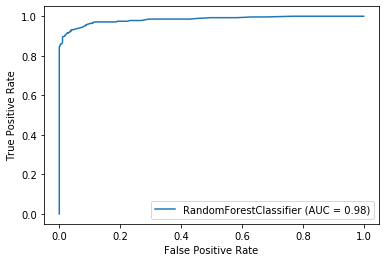

In [14]:
roc = plot_roc_curve(msr_model, X_test_count, y_test)

In [15]:
importances = pd.DataFrame(msr_model.feature_importances_, index = X_train_count.columns,
                            columns=['importance']).sort_values('importance', ascending=False)

importances[:15]

,importance
loc,0.038714
workflow,0.030199
cluster,0.023158
app,0.020318
coordinator,0.020052
node,0.014867
jpa,0.014121
wf,0.013069
jpaservice,0.012843
getfilesystem,0.012789


Text(0, 0.5, 'Token')

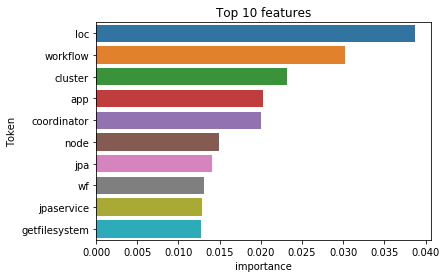

In [18]:
sns.barplot(y=importances.index[:10], x=importances['importance'][:10])
plt.title('Top 10 features')
plt.ylabel('Token')

### Evaluating model on new data

In [19]:
new_data = pd.read_csv('../new_data/dataset.csv')
y_new = new_data['class']
new = new_data.drop(columns=['class'])

In [20]:
X_new = msr_vectorizer.transform(new['token'])
sparse_matrix_new = pd.DataFrame(X_new.toarray(), columns = msr_vectorizer.get_feature_names())
X_new_count = concat_loc_sum(sparse_matrix_new, new_data)

new_preds = msr_model.predict(X_new_count)
print(classification_report(y_new, new_preds))

              precision    recall  f1-score   support

           0       0.51      0.95      0.66       724
           1       0.67      0.10      0.17       737

    accuracy                           0.52      1461
   macro avg       0.59      0.52      0.42      1461
weighted avg       0.59      0.52      0.41      1461

